# Kernel SVM And K_Fold_CrossValidation

### Importing Datasets And Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

C:\Users\NIRMALYA\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
data_set = pd.read_csv('Social_Network_Ads.csv')
print(data_set)
print(data_set.describe())

      User ID  Gender   Age  EstimatedSalary  Purchased
0    15624510    Male  19.0          19000.0          0
1    15810944    Male  35.0          20000.0          0
2    15668575  Female  26.0          43000.0          0
3    15603246  Female  27.0          57000.0          0
4    15804002    Male  19.0          76000.0          0
..        ...     ...   ...              ...        ...
395  15691863  Female  46.0          41000.0          1
396  15706071    Male  51.0          23000.0          1
397  15654296  Female  50.0          20000.0          1
398  15755018    Male  36.0          33000.0          0
399  15594041  Female  49.0          36000.0          1

[400 rows x 5 columns]
            User ID         Age  EstimatedSalary   Purchased
count  4.000000e+02  400.000000       400.000000  400.000000
mean   1.569154e+07   37.655000     69742.500000    0.357500
std    7.165832e+04   10.482877     34096.960282    0.479864
min    1.556669e+07   18.000000     15000.000000    0.000000

In [3]:
X = data_set.iloc[:, 3:5].values
X

array([[1.90e+04, 0.00e+00],
       [2.00e+04, 0.00e+00],
       [4.30e+04, 0.00e+00],
       [5.70e+04, 0.00e+00],
       [7.60e+04, 0.00e+00],
       [5.80e+04, 0.00e+00],
       [8.40e+04, 0.00e+00],
       [1.50e+05, 1.00e+00],
       [3.30e+04, 0.00e+00],
       [6.50e+04, 0.00e+00],
       [8.00e+04, 0.00e+00],
       [5.20e+04, 0.00e+00],
       [8.60e+04, 0.00e+00],
       [1.80e+04, 0.00e+00],
       [8.20e+04, 0.00e+00],
       [8.00e+04, 0.00e+00],
       [2.50e+04, 1.00e+00],
       [2.60e+04, 1.00e+00],
       [2.80e+04, 1.00e+00],
       [2.90e+04, 1.00e+00],
       [2.20e+04, 1.00e+00],
       [4.90e+04, 1.00e+00],
       [4.10e+04, 1.00e+00],
       [2.20e+04, 1.00e+00],
       [2.30e+04, 1.00e+00],
       [2.00e+04, 1.00e+00],
       [2.80e+04, 1.00e+00],
       [3.00e+04, 1.00e+00],
       [4.30e+04, 0.00e+00],
       [1.80e+04, 0.00e+00],
       [7.40e+04, 0.00e+00],
       [1.37e+05, 1.00e+00],
       [1.60e+04, 0.00e+00],
       [4.40e+04, 0.00e+00],
       [9.00e+

In [4]:
y = data_set.iloc[:, -1].values
y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,

### Feature Scaling

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [7]:
print(X)

[[-1.49004624 -0.74593581]
 [-1.46068138 -0.74593581]
 [-0.78528968 -0.74593581]
 [-0.37418169 -0.74593581]
 [ 0.18375059 -0.74593581]
 [-0.34481683 -0.74593581]
 [ 0.41866944 -0.74593581]
 [ 2.35674998  1.34059793]
 [-1.07893824 -0.74593581]
 [-0.13926283 -0.74593581]
 [ 0.30121002 -0.74593581]
 [-0.52100597 -0.74593581]
 [ 0.47739916 -0.74593581]
 [-1.51941109 -0.74593581]
 [ 0.35993973 -0.74593581]
 [ 0.30121002 -0.74593581]
 [-1.3138571   1.34059793]
 [-1.28449224  1.34059793]
 [-1.22576253  1.34059793]
 [-1.19639767  1.34059793]
 [-1.40195167  1.34059793]
 [-0.60910054  1.34059793]
 [-0.84401939  1.34059793]
 [-1.40195167  1.34059793]
 [-1.37258681  1.34059793]
 [-1.46068138  1.34059793]
 [-1.22576253  1.34059793]
 [-1.16703281  1.34059793]
 [-0.78528968 -0.74593581]
 [-1.51941109 -0.74593581]
 [ 0.12502088 -0.74593581]
 [ 1.97500684  1.34059793]
 [-1.5781408  -0.74593581]
 [-0.75592482 -0.74593581]
 [ 0.59485858 -0.74593581]
 [-1.25512738 -0.74593581]
 [-1.22576253 -0.74593581]
 

### Spliting Datasets

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [10]:
print(X_train, X_test, y_train, y_test)

[[-0.52100597 -0.74593581]
 [-1.1083031   1.34059793]
 [-1.51941109 -0.74593581]
 [-0.4329114  -0.74593581]
 [ 0.94723686  1.34059793]
 [ 2.32738512  1.34059793]
 [-0.28608712 -0.74593581]
 [-0.4329114  -0.74593581]
 [-0.78528968 -0.74593581]
 [-0.4329114  -0.74593581]
 [-0.60910054  1.34059793]
 [ 0.12502088  1.34059793]
 [-0.52100597 -0.74593581]
 [-1.37258681 -0.74593581]
 [-1.25512738 -0.74593581]
 [ 0.06629116 -0.74593581]
 [ 0.06629116 -0.74593581]
 [-1.37258681  1.34059793]
 [-1.04957339  1.34059793]
 [-0.28608712  1.34059793]
 [-1.07893824 -0.74593581]
 [-1.22576253  1.34059793]
 [ 0.56549373  1.34059793]
 [ 0.06629116 -0.74593581]
 [ 0.30121002  1.34059793]
 [-0.78528968 -0.74593581]
 [ 0.27184516 -0.74593581]
 [-1.02020853 -0.74593581]
 [ 0.77104772  1.34059793]
 [ 2.35674998  1.34059793]
 [ 0.03692631 -0.74593581]
 [-0.28608712  1.34059793]
 [ 0.41866944 -0.74593581]
 [-0.60910054 -0.74593581]
 [-0.4329114  -0.74593581]
 [ 0.33057487 -0.74593581]
 [-1.13766796 -0.74593581]
 

### Clasifying

In [11]:
from sklearn.svm import SVC

C:\Users\NIRMALYA\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [12]:
classifier = SVC(kernel = 'sigmoid')

In [13]:
classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

### Predicting

In [14]:
y_pred = classifier.predict(X_test)

In [15]:
for _ in zip(y_pred, y_test):
    print(*_)

0 0
0 0
1 1
0 0
0 0
1 1
0 0
0 0
1 1
1 1
0 0
1 1
0 0
0 0
0 0
1 1
1 1
0 0
0 0
0 0
1 1
0 0
0 0
0 0
0 0
0 0
0 0
1 1
0 0
0 0
0 0
1 1
0 0
1 1
1 1
0 0
0 0
0 0
1 0
1 1
0 0
1 1
0 0
0 0
1 1
0 0
0 0
0 0
0 0
1 1
1 1
0 0
0 0
1 1
0 0
0 0
0 0
1 1
1 1
0 0
1 1
0 0
0 0
1 1
1 1
0 0
1 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 1
1 1
0 0
0 0
1 1
0 0
0 0
0 0
1 1
0 0
0 0
0 0
1 1
0 0
1 1
1 1
0 0
0 0
0 0
0 0
1 1
0 0
0 0


### Confussion Matrix

In [16]:
from sklearn.metrics import confusion_matrix

In [17]:
cm = confusion_matrix(y_test, y_pred)

In [18]:
print(cm)

[[67  1]
 [ 0 32]]


In [19]:
cm.shape

(2, 2)

### Applying K_Fold_CrossValidation

In [22]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10, n_jobs = -1)
print(accuracies.mean(), accuracies.std())

1.0 0.0


### Visualizing Training Dataset

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


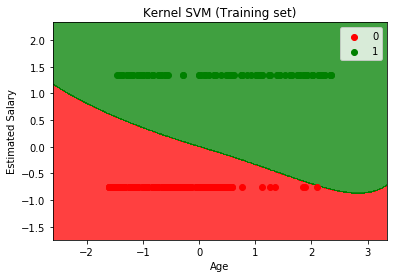

In [80]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Kernel SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

### Visualizing Test Set

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


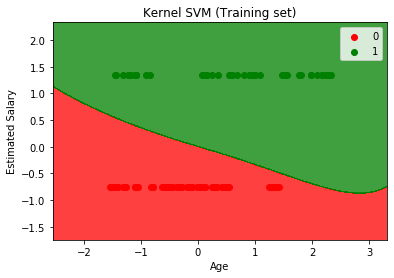

In [81]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Kernel SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

# END